### Plot the figures in the main page

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import json
#script_dir = osp.realpath(__file__)
js_f = osp.normpath(osp.join("../aly","feat_dict.json"))
with open(js_f, 'r') as infile:
    feat_dict = json.load(infile)
feat_col = feat_dict['norm_onehot_feats'][0:8]
feat_col.append('ltt_shape_cat')
feat_col.append('gamma_cat')

In [3]:
feat_col1 = []
for item in feat_col:
    if 'norm' in item:
        temp = item[0:-5]
        if 'R0' in temp:
            feat_col1.append('R0')
        else:
            feat_col1.append(temp)
    else:
        feat_col1.append(item)

### Permutation Importance

In [107]:
#6 models in main text
Models = ['RF','MLP','TabNet','DeepDynaTree-GCN','DeepDynaTree-GIN','DeepDynaTree-PDGLSTM']
model_file = ['rf','mlp','tabnet','gcn','gin','pdglstm']

In [4]:
#pdglstm only
Models = ['DeepDynaTree-PDGLSTM']
model_file = ['pdglstm']

In [14]:
import csv

pmt_df = pd.DataFrame(columns=['Node Features','Models','reduced_acc','reduced_balance_acc','reduced_f1_weighted','reduced_f1_macro','reduced_brier_score','reduced_cross_entropy','reduced_macro_auc','reduced_weighted_auc'])
i = -1
j = 0
for model in model_file:
    print(model)
    i += 1
    with open(f"/mnt/data2/chaoyue/result/ddt/test/{model}50/None-test.csv") as f:
        r = csv.reader(f)
        for row in r:
            if model in ['lr','rf','xgb']:
                ref = np.array(row[0:-2])
            else:
                if model in ['transet','deepset','tabnet']:
                    ref = np.array(row[1:7]+row[9:-2])
                else:
                    ref = np.array(row[1:7]+row[9:-2])
            ref = ref.astype(float)
            break
    k = 0
    for feat in feat_col:
        title = [feat_col1[k],Models[i]]
        k += 1
        with open(f"/mnt/data2/chaoyue/result/ddt/test/{model}50/{feat}-test.csv") as f:
            r = csv.reader(f)
            for row in r:
                if model in ['lr','rf','xgb']:
                    record = np.array(row[0:-2])
                else:
                    if model in ['transet','deepset','tabnet']:
                        record = np.array(row[1:7]+row[9:-2])
                    else:
                        record = np.array(row[1:7]+row[9:-2])
                record = record.astype(float)
                record = title+list(abs(record-ref)/ref[1])
                #record = title+list(abs(record-ref))
                pmt_df.loc[j] = record
                j += 1

pdglstm


In [15]:
ref[1]

0.7949

In [16]:
pmt_df

,Node Features,Models,reduced_acc,reduced_balance_acc,reduced_f1_weighted,reduced_f1_macro,reduced_brier_score,reduced_cross_entropy,reduced_macro_auc,reduced_weighted_auc
0,oster,DeepDynaTree-PDGLSTM,0.123915,0.078752,0.116367,0.109951,0.161907,0.251981,0.045666,0.057366
1,oster,DeepDynaTree-PDGLSTM,0.123160,0.078878,0.115738,0.109448,0.160649,0.249717,0.045289,0.056988
2,oster,DeepDynaTree-PDGLSTM,0.124292,0.079507,0.116870,0.110580,0.162662,0.253114,0.045792,0.057366
3,oster,DeepDynaTree-PDGLSTM,0.123412,0.079255,0.115989,0.109699,0.161152,0.250723,0.045666,0.057240
4,oster,DeepDynaTree-PDGLSTM,0.122783,0.078500,0.115486,0.109070,0.160523,0.249969,0.045415,0.056988
...,...,...,...,...,...,...,...,...,...,...
495,gamma_cat,DeepDynaTree-PDGLSTM,0.013461,0.007800,0.012454,0.013964,0.016606,0.024154,0.005284,0.006416
496,gamma_cat,DeepDynaTree-PDGLSTM,0.013587,0.007926,0.012580,0.014090,0.016480,0.023777,0.005158,0.006038
497,gamma_cat,DeepDynaTree-PDGLSTM,0.012706,0.006793,0.011825,0.012706,0.015725,0.022896,0.004906,0.005787
498,gamma_cat,DeepDynaTree-PDGLSTM,0.013083,0.007045,0.012203,0.013461,0.016228,0.023651,0.005032,0.006038


In [17]:
feat_col

['oster-norm',
 'PD-norm',
 'abs_growth_rate-norm',
 'fraction_time_growth-norm',
 'r_max-norm',
 'cherries-norm',
 'BLD-norm',
 'new_R0-norm',
 'ltt_shape_cat',
 'gamma_cat']

In [18]:
feat_dict = {'gamma_cat':r'$\gamma$', 
             'oster':'Oster', 
             'PD':'PD', 
             'R0':r'$R_0$',
             'abs_growth_rate':'Abs Growth Rate',
             'fraction_time_growth':'Fraction Time Growth',
             'r_max':r'$R_{max}$',
             'ltt_shape_cat':'LTT Shape',
             'cherries':'Cherries',
             'BLD':'BLD' }

In [19]:
pmt_df['Node Features'] = pmt_df['Node Features'].map(feat_dict)

In [20]:
set(pmt_df['Node Features'].values)

{'$R_0$',
 '$R_{max}$',
 '$\\gamma$',
 'Abs Growth Rate',
 'BLD',
 'Cherries',
 'Fraction Time Growth',
 'LTT Shape',
 'Oster',
 'PD'}

In [21]:
order_df = pd.DataFrame(columns=['feat','value'])
i = 0
for feat in set(pmt_df['Node Features'].values):
    a = sum(pmt_df[pmt_df['Node Features']==feat]['reduced_balance_acc'].values)
    order_df.loc[i] = [feat,a]
    i += 1
order_df

,feat,value
0,$R_{max}$,0.003774
1,$R_0$,0.103032
2,Fraction Time Growth,0.071959
3,Oster,3.920367
4,Abs Growth Rate,0.005661
5,BLD,0.768273
6,LTT Shape,0.274374
7,$\gamma$,0.374009
8,Cherries,0.287961
9,PD,2.594163


In [22]:
order_df.sort_values("value",ascending=False)

,feat,value
3,Oster,3.920367
9,PD,2.594163
5,BLD,0.768273
7,$\gamma$,0.374009
8,Cherries,0.287961
6,LTT Shape,0.274374
1,$R_0$,0.103032
2,Fraction Time Growth,0.071959
4,Abs Growth Rate,0.005661
0,$R_{max}$,0.003774


In [117]:
order = list(order_df.sort_values("value",ascending=False)['feat'].values)

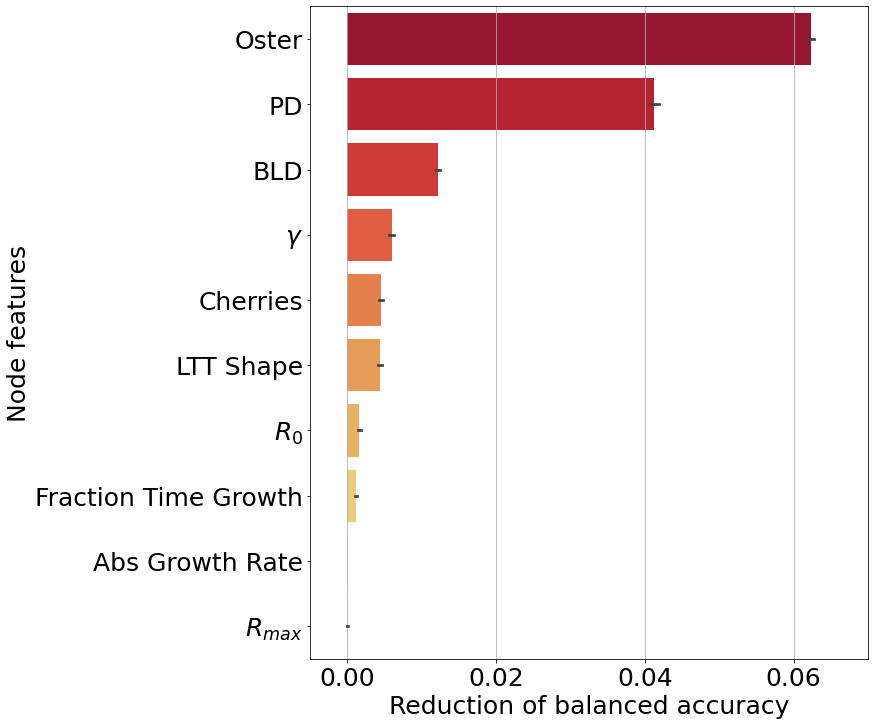

In [77]:
fig1 = plt.figure(figsize=(10,12))
plt.rcParams.update({'font.size': 25})
ax = sns.barplot(y="Node Features",x="reduced_balance_acc",  data=pmt_df, order=order, hue_order=order, ci='sd',palette=sns.color_palette('YlOrRd_r',len(order)))
ax.set_xlim(-.005,.07)
plt.grid(axis="x")
#plt.xticks(rotation=70)
plt.ylabel('Node features',fontsize=25)
plt.xlabel('Reduction of balanced accuracy',fontsize=25)
plt.show()
fig1.savefig('../paper/pdglstm_feat.eps',dpi=1200,format='eps',bbox_inches='tight',pad_inches=0.0)

In [118]:
for feat in set(pmt_df['Node Features'].values):
    print(feat)
    print(sum(pmt_df[pmt_df['Node Features']==feat]['reduced_balance_acc'].values))

Fraction Time Growth
1.2231436360990742
Oster
36.95858123015665
Cherries
1.4710590718878
$R_{max}$
2.1715118697700238
PD
13.416056371734141
Abs Growth Rate
12.593012307778901


In [20]:
A = pmt_df[pmt_df.Models==Models[5]]

In [21]:
sum(A[A["Node Features"]=='PD']['reduced_balance_acc'].values)/50

0.02416013505365976

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


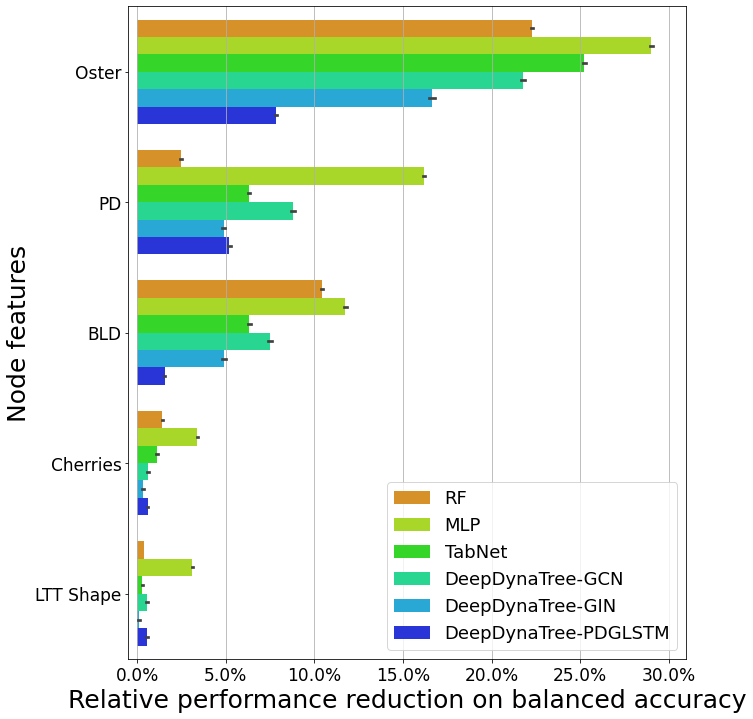

In [37]:
from matplotlib import ticker
df1 = pmt_df[pmt_df["Node Features"]=='LTT Shape']
df1.loc[df1["Node Features"]=='LTT Shape',"Node Features"] = 'LTT Shape'
#df1.loc[df1["Node Features"]=="v_sampling_fraction","Node Features"] = 'Sampling Fraction'
for feat in ["Cherries","BLD","PD","Oster"]:
    df = pmt_df[pmt_df["Node Features"]==feat]
    if feat in ["v_cluster_size"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Cluster Size'
    if feat in ["v_timespan"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Time Span'
    if feat in ["Oster"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Oster'
    if feat in ["Cherries"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Cherries'
    df1 = pd.concat([df,df1],axis=0,ignore_index=True)

fig1 = plt.figure(figsize=(10,12))
plt.rcParams.update({'font.size': 17})
ax = sns.barplot(y="Node Features",x="reduced_balance_acc",hue = "Models",ci='sd',data=df1,palette=sns.hls_palette(9, h=.1, l=.5, s=.9))
ax.set_xlim(-.005,.31)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=1))
plt.legend(loc=4,fontsize=18)
plt.grid(axis="x")
#plt.xticks(rotation=70)
plt.ylabel('Node features',fontsize=25)
plt.xlabel('Relative performance reduction on balanced accuracy',fontsize=25)
plt.show()
fig1.savefig('../paper/impt.svg',dpi=1200, format='svg',bbox_inches='tight')


In [38]:
df1

,Node Features,Models,reduced_acc,reduced_balance_acc,reduced_f1_weighted,reduced_f1_macro,reduced_brier_score,reduced_cross_entropy,reduced_macro_auc,reduced_weighted_auc
0,Oster,RF,0.077844,0.222634,0.075931,0.138269,0.055336,0.091029,0.129937,0.133776
1,Oster,RF,0.079012,0.223997,0.077234,0.139603,0.055781,0.091669,0.130576,0.134608
2,Oster,RF,0.078488,0.222694,0.076672,0.138748,0.055558,0.091393,0.130009,0.133679
3,Oster,RF,0.077508,0.221825,0.075646,0.137805,0.055397,0.091189,0.129657,0.133411
4,Oster,RF,0.078428,0.222749,0.076530,0.138629,0.055424,0.091115,0.129854,0.133921
...,...,...,...,...,...,...,...,...,...,...
1495,LTT Shape,DeepDynaTree-PDGLSTM,0.003900,0.005661,0.003900,0.006290,0.005284,0.008806,0.003900,0.005535
1496,LTT Shape,DeepDynaTree-PDGLSTM,0.003397,0.005284,0.003397,0.005661,0.005158,0.008806,0.003900,0.005409
1497,LTT Shape,DeepDynaTree-PDGLSTM,0.004151,0.005913,0.004026,0.006290,0.005158,0.008555,0.003774,0.005158
1498,LTT Shape,DeepDynaTree-PDGLSTM,0.003397,0.004655,0.003397,0.005284,0.005032,0.008680,0.003774,0.005284


### ROC curve

In [39]:
area=['0.709','0.693','0.656','0.783','0.827','0.882']

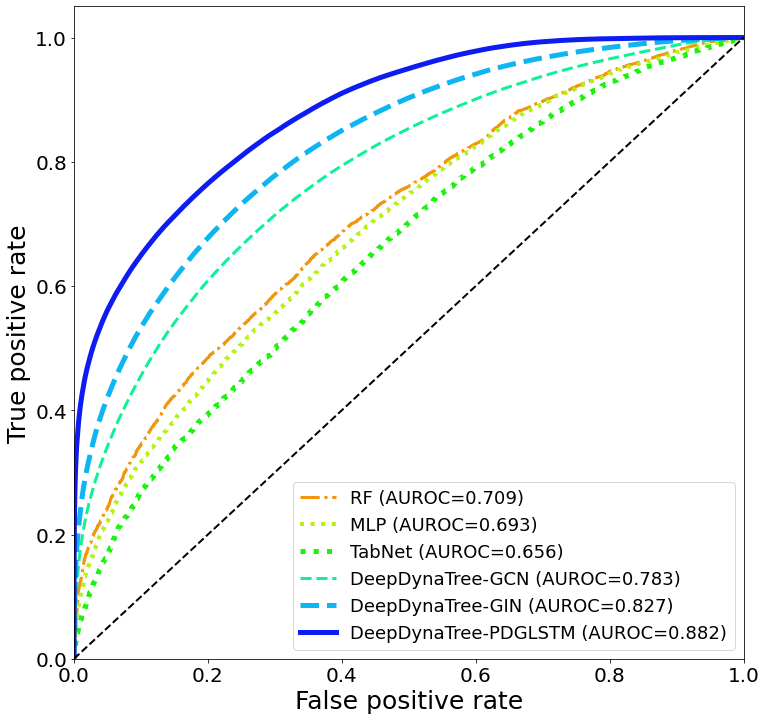

In [41]:
from itertools import cycle
from matplotlib.colors import ListedColormap
fig2 = plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 20})
i = 0
ltype = ['-.',':', ':','--','--']
lw = [3,4,5,3,5]
my_cmap = sns.hls_palette(9, h=.1, l=.5, s=.9)
for model,color in zip(model_file,my_cmap):
    roc = pd.read_csv(f"/mnt/data2/chaoyue/result/ddt/test/ROC/roc_{model}.csv")
    fpr = roc["fpr"]
    tpr = roc["tpr"]
    if model == 'pdglstm':
        plt.plot(fpr, tpr,'-',
                 label=f"{Models[i]} (AUROC={area[i]})",
                 color=color,linewidth=5)
    else:
        plt.plot(fpr, tpr,ltype[i],
                 label=f"{Models[i]} (AUROC={area[i]})",
                 color=color, linewidth=lw[i])
    i += 1

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate',fontsize=25)
plt.ylabel('True positive rate',fontsize=25)
#plt.title('Macro-Average Receiver Operating Characteristic Curves')
plt.legend(loc="lower right",fontsize=18)
plt.show()
fig2.savefig('../paper/roc.svg',dpi=600,format='svg')

### Confusion matrix

In [42]:
labels = ['Decay','Static','Growth']
cm_Models = ['RF','MLP','TabNet','DeepDynaTree-GCN','DeepDynaTree-GIN','DeepDynaTree-PDGLSTM']
cm_model_file = ['rf','mlp','tabnet','gcn','gin','pdglstm']

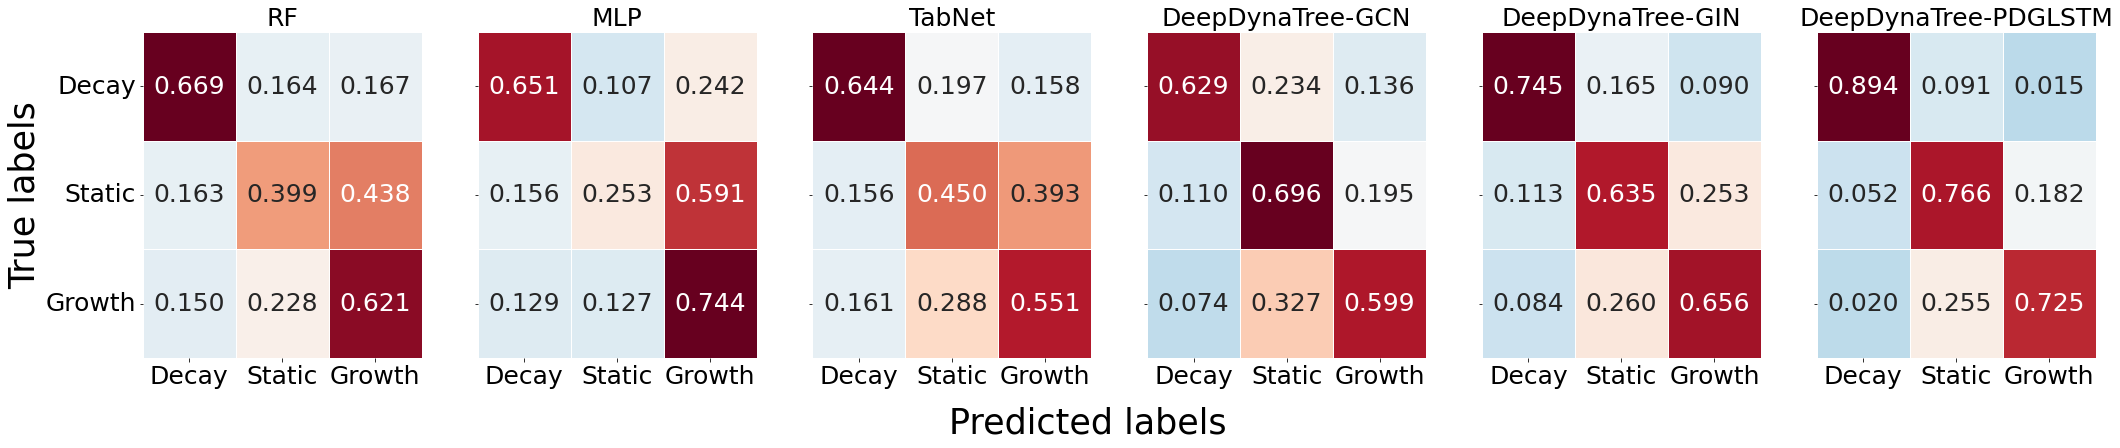

In [44]:
from sklearn.metrics import confusion_matrix
i=0
rdgn = sns.diverging_palette(h_neg=110, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
fig3, ax = plt.subplots(1,6, sharex=True, sharey=True,figsize=(35,6))
plt.rcParams.update({'font.size': 25})
for model,(i,axi) in zip(cm_model_file,enumerate(ax.flat)):
    cm = pd.read_csv(f"/mnt/data2/chaoyue/result/ddt/test/cm/cm_{model}.csv")
    cm.loc[cm['true']==0,'true'] = 111
    cm.loc[cm['true']==1,'true'] = 0
    cm.loc[cm['true']==111,'true'] = 1
    cm.loc[cm['predict']==0,'predict'] = 111
    cm.loc[cm['predict']==1,'predict'] = 0
    cm.loc[cm['predict']==111,'predict'] = 1
    y_test_arr = cm["true"]
    y_test_pred = cm["predict"]
    conf_mat = confusion_matrix(y_test_arr, y_test_pred, normalize="true")
    
    sns.heatmap(conf_mat, center=0.2,annot=True, fmt=".3f", linewidths=.5, cmap='RdBu_r', ax=axi, cbar=False,annot_kws={"fontsize":25})
    

    axi.set_xticklabels(labels, fontsize=25)
    axi.set_yticklabels(labels, fontsize=25)
    plt.setp(axi.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
    axi.set_title(cm_Models[i],fontsize=25)
    i += 1
    # Rotate the tick labels and set their alignment.
ax[0].set_ylabel('True labels', fontsize=35)

#ax[4].set_xlabel('Predicted labels', fontsize=25)
fig3.text(0.5,-0.05,'Predicted labels', ha='center',fontsize=35)
fig3.savefig('../paper/cm.svg',dpi=600, bbox_inches='tight', pad_inches=1, format='svg',)
plt.show()

## Model limitation analysis

In [33]:
cor_org_df = pd.read_csv(f'/mnt/data2/chaoyue/result/ddt/test/mis_aly/cor_org.csv')
cor_org_df = cor_org_df[cor_org_df['label'] != 3]
cor_org_df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.631032,3.290745,-0.782866
1,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.657813,2.456428,-0.195627
2,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.029596,4.487266,-1.538111
3,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,0,3.025898,0.287590,0.837771
4,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,0.326531,2.0,1.824276,2,2,2.326966,-3.498617,4.601852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072392,10099.0,3.0,0.378970,97.0,56.0,56.006850,239.0,1.810636,0.111111,38.895527,0.190476,-2.5,1.880629,2,2,0.967754,-3.839185,5.110500
1072393,10099.0,3.0,0.378970,97.0,56.0,56.006850,239.0,1.810636,0.111111,38.895527,0.190476,-2.5,1.880629,2,2,0.875729,-4.158272,5.567754
1072394,10099.0,3.0,0.378970,97.0,56.0,56.006850,239.0,1.810636,0.111111,38.895527,0.190476,-2.5,1.880629,2,2,1.586200,-3.465126,4.681306
1072395,10099.0,3.0,0.378970,97.0,56.0,56.006850,239.0,1.810636,0.111111,38.895527,0.190476,-2.5,1.880629,2,2,1.262101,-3.950647,5.376697


In [34]:
mis_org_df = pd.read_csv(f'/mnt/data2/chaoyue/result/ddt/test/mis_aly/mis_org.csv')
mis_org_df = mis_org_df[mis_org_df['label'] != 3]
mis_org_df = mis_org_df.reset_index(drop=True)
mis_org_df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,1,1.776350,1.948528,-0.014647
1,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,1,2.236259,2.807514,-0.971230
2,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,1,1.421822,2.523721,-0.424674
3,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,0.326531,2.0,1.824276,2,0,2.673434,0.042914,1.193717
4,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,1,2.132479,2.807929,-0.815997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324760,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,2,1.840322,0.008168,1.854405
324761,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.692484,1.948840,0.080190
324762,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.542226,1.623368,0.449515
324763,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.646238,1.971350,0.121342


In [35]:
df = pd.concat([cor_org_df,mis_org_df],axis=0,ignore_index=True)
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.631032,3.290745,-0.782866
1,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.657813,2.456428,-0.195627
2,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.029596,4.487266,-1.538111
3,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,0,3.025898,0.287590,0.837771
4,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,0.326531,2.0,1.824276,2,2,2.326966,-3.498617,4.601852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,2,1.840322,0.008168,1.854405
1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.692484,1.948840,0.080190
1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.542226,1.623368,0.449515
1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.646238,1.971350,0.121342


In [36]:
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.631032,3.290745,-0.782866
1,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.657813,2.456428,-0.195627
2,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.029596,4.487266,-1.538111
3,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,0,3.025898,0.287590,0.837771
4,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,0.326531,2.0,1.824276,2,2,2.326966,-3.498617,4.601852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,2,1.840322,0.008168,1.854405
1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.692484,1.948840,0.080190
1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.542226,1.623368,0.449515
1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.646238,1.971350,0.121342


In [37]:
tree_ids = df['sim'].unique()
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','BLD','r_max']:
    cats, bins = pd.qcut(df[feat], 8, retbins=True, duplicates='drop',precision=2)
    cat_dict = {cat: i for i, cat in enumerate(cats.unique())}
    df[f"{feat}_bins"] = cats
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,...,pred_score_1,pred_score_2,v_sampling_fraction_bins,v_cluster_size_bins,v_timespan_bins,oster_bins,PD_bins,cherries_bins,BLD_bins,r_max_bins
0,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,...,3.290745,-0.782866,"(0.52, 0.66]","(82.0, 128.0]","(34.0, 39.0]","(39.01, 52.01]","(515.0, 710.0]","(0.32, 0.34]","(2.0, 3.0]","(113.73, 186.47]"
1,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,...,2.456428,-0.195627,"(0.52, 0.66]","(82.0, 128.0]","(34.0, 39.0]","(39.01, 52.01]","(515.0, 710.0]","(0.32, 0.34]","(2.0, 3.0]","(113.73, 186.47]"
2,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,...,4.487266,-1.538111,"(0.52, 0.66]","(82.0, 128.0]","(34.0, 39.0]","(39.01, 52.01]","(515.0, 710.0]","(0.32, 0.34]","(2.0, 3.0]","(113.73, 186.47]"
3,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,...,0.287590,0.837771,"(0.11, 0.22]","(502.0, 1162.0]","(18.0, 22.0]","(18.02, 22.01]","(376.0, 515.0]","(0.26, 0.28]","(-18.01, -2.0]","(43.24, 70.54]"
4,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,...,-3.498617,4.601852,"(0.37, 0.52]","(193.0, 292.0]","(29.0, 34.0]","(29.01, 34.01]","(1520.0, 5334.0]","(0.32, 0.34]","(1.0, 2.0]","(356.21, 3132914.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,0.008168,1.854405,"(0.8, 0.91]","(19.99, 47.0]","(18.0, 22.0]","(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]"
1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,1.948840,0.080190,"(0.8, 0.91]","(19.99, 47.0]","(18.0, 22.0]","(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]"
1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,1.623368,0.449515,"(0.8, 0.91]","(19.99, 47.0]","(18.0, 22.0]","(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]"
1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,1.971350,0.121342,"(0.8, 0.91]","(19.99, 47.0]","(18.0, 22.0]","(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]"


In [38]:
group_dict = {}
i = 0
for group in ['A','B','C','D','E','F','G']:
    group_dict[i] = group
    i += 1
group_dict

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}

In [39]:
df['state'] = df['state_id'].apply(lambda x: group_dict[x])

In [40]:
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,...,pred_score_2,v_sampling_fraction_bins,v_cluster_size_bins,v_timespan_bins,oster_bins,PD_bins,cherries_bins,BLD_bins,r_max_bins,state
0,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,...,-0.782866,"(0.52, 0.66]","(82.0, 128.0]","(34.0, 39.0]","(39.01, 52.01]","(515.0, 710.0]","(0.32, 0.34]","(2.0, 3.0]","(113.73, 186.47]",G
1,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,...,-0.195627,"(0.52, 0.66]","(82.0, 128.0]","(34.0, 39.0]","(39.01, 52.01]","(515.0, 710.0]","(0.32, 0.34]","(2.0, 3.0]","(113.73, 186.47]",G
2,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,...,-1.538111,"(0.52, 0.66]","(82.0, 128.0]","(34.0, 39.0]","(39.01, 52.01]","(515.0, 710.0]","(0.32, 0.34]","(2.0, 3.0]","(113.73, 186.47]",G
3,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,...,0.837771,"(0.11, 0.22]","(502.0, 1162.0]","(18.0, 22.0]","(18.02, 22.01]","(376.0, 515.0]","(0.26, 0.28]","(-18.01, -2.0]","(43.24, 70.54]",D
4,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,...,4.601852,"(0.37, 0.52]","(193.0, 292.0]","(29.0, 34.0]","(29.01, 34.01]","(1520.0, 5334.0]","(0.32, 0.34]","(1.0, 2.0]","(356.21, 3132914.0]",F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,1.854405,"(0.8, 0.91]","(19.99, 47.0]","(18.0, 22.0]","(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]",B
1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,0.080190,"(0.8, 0.91]","(19.99, 47.0]","(18.0, 22.0]","(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]",B
1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,0.449515,"(0.8, 0.91]","(19.99, 47.0]","(18.0, 22.0]","(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]",B
1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,0.121342,"(0.8, 0.91]","(19.99, 47.0]","(18.0, 22.0]","(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]",B


In [41]:
# TB: D growth, E decay
PT_dict_resp = {'A': 0.015, 'B': 0.09, 'C': 0.11, 'D': 0.09, 'E': 0.12, 'F': 0.11, 'G': 0.11}
PT_dict_tb = {'A': 0.025, 'B': 0.015, 'D': 0.015, 'E': 0.025}

In [42]:
df.loc[df['sim']<=10000, 'PT'] = df[df['sim']<=10000]['state'].apply(lambda x: PT_dict_resp[x])
df.loc[df['sim']>10000, 'PT'] = df[df['sim']>10000]['state'].apply(lambda x: PT_dict_tb[x])

In [43]:
df['PT'].unique()

array([0.11 , 0.09 , 0.12 , 0.015, 0.025])

In [44]:
R0_dict_resp = {'A':2.2,'B':3.2,'C':3.9,'D':4.9,'E':4.3,'F':0.8,'G':9.8}
R0_dict_tb = {'A':1.5,'B':0.9,'D':0.7,'E':1.5}

In [45]:
df.loc[df['sim']<=10000, 'R0'] = df[df['sim']<=10000]['state'].apply(lambda x: R0_dict_resp[x])
df.loc[df['sim']>10000, 'R0'] = df[df['sim']>10000]['state'].apply(lambda x: R0_dict_tb[x])

In [46]:
df['R0'].unique()

array([9.8, 4.9, 0.8, 3.2, 4.3, 3.9, 0.7, 0.9, 1.5])

In [47]:
Init_Contact_dict_resp = {'A':16,'B':4,'C':4,'D':6,'E':4,'F':4,'G':6}
Init_Contact_dict_tb = {'A':20,'B':20,'D':15,'E':20}

In [48]:
df.loc[df['sim']<=10000, 'Contact'] = df[df['sim']<=10000]['state'].apply(lambda x: Init_Contact_dict_resp[x])
df.loc[df['sim']>10000, 'Contact'] = df[df['sim']>10000]['state'].apply(lambda x: Init_Contact_dict_tb[x])

In [49]:
df['Contact'].unique()

array([ 6.,  4., 15., 20.])

In [50]:
label_dict = {0:'Static',1:'Decay',2:'Growth'}
label_dict

{0: 'Static', 1: 'Decay', 2: 'Growth'}

In [51]:
df['labels'] = df['label'].apply(lambda x: label_dict[x])

In [52]:
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,...,oster_bins,PD_bins,cherries_bins,BLD_bins,r_max_bins,state,PT,R0,Contact,labels
0,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,...,"(39.01, 52.01]","(515.0, 710.0]","(0.32, 0.34]","(2.0, 3.0]","(113.73, 186.47]",G,0.110,9.8,6.0,Decay
1,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,...,"(39.01, 52.01]","(515.0, 710.0]","(0.32, 0.34]","(2.0, 3.0]","(113.73, 186.47]",G,0.110,9.8,6.0,Decay
2,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,...,"(39.01, 52.01]","(515.0, 710.0]","(0.32, 0.34]","(2.0, 3.0]","(113.73, 186.47]",G,0.110,9.8,6.0,Decay
3,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,...,"(18.02, 22.01]","(376.0, 515.0]","(0.26, 0.28]","(-18.01, -2.0]","(43.24, 70.54]",D,0.090,4.9,6.0,Static
4,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,...,"(29.01, 34.01]","(1520.0, 5334.0]","(0.32, 0.34]","(1.0, 2.0]","(356.21, 3132914.0]",F,0.110,0.8,4.0,Growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,"(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]",B,0.015,0.9,20.0,Static
1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,"(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]",B,0.015,0.9,20.0,Static
1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,"(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]",B,0.015,0.9,20.0,Static
1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,...,"(18.02, 22.01]","(181.0, 277.0]","(0.11, 0.26]","(-1.0, 0.0]","(-3.36, 13.31]",B,0.015,0.9,20.0,Static


In [53]:
label_weights = [0.5017934887494581, 3.612215736408558, 1.3692816859931418]

In [133]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, f1_score, balanced_accuracy_score, brier_score_loss, log_loss, precision_score, recall_score
import torch.nn.functional as F
import torch
from collections import Counter
torch.set_default_tensor_type(torch.DoubleTensor)
num_bin = 8
def cal_auc(sub_df,feat):
    bin_list = []
    acc_list = []
    if feat in ['state','PT','R0','Contact','labels']:
        group_list = set(df[feat].values)
        for group in group_list:
            bin_list.append(group)
            subsub_df = sub_df[sub_df[feat]==group]
            y_true = subsub_df['label'].values
            #y_pred = subsub_df[['pred_score_0','pred_score_1','pred_score_2']].values
            y_pred = subsub_df['pred_label'].values
            #acc = F.cross_entropy(torch.from_numpy(y_pred), torch.from_numpy(y_true), weight=torch.tensor(label_weights), size_average=None, reduce=None, reduction='mean')
            #acc_list.append(acc.cpu().detach().numpy().tolist())
            
            acc = 0
            div = 0
            for i in [0,1,2]:
                idx = np.where(y_true==i)
                pred = y_pred[idx]
                count_dict = Counter(pred)
                if len(pred) > 0:
                    acc += count_dict[i]/len(pred)
                    div += 1
            #acc = balanced_accuracy_score(y_true,y_pred)
            #acc_list.append(acc.cpu().detach().numpy().tolist())
            
            acc_list.append(acc/div)
            
    else:
        cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
        for interval in cats.unique():
            bin_list.append(interval)
            subsub_df = sub_df[(sub_df[feat]>interval.left)&(sub_df[feat]<=interval.right)]
            y_true = subsub_df['label'].values
            #y_pred = subsub_df[['pred_score_0','pred_score_1','pred_score_2']].values
            y_pred = subsub_df['pred_label'].values
            #acc = F.cross_entropy(torch.from_numpy(y_pred), torch.from_numpy(y_true), weight=torch.tensor(label_weights), size_average=None, reduce=None, reduction='mean')
            
            acc = 0
            div = 0
            for i in [0,1,2]:
                idx = np.where(y_true==i)
                pred = y_pred[idx]
                count_dict = Counter(pred)
                if len(pred) > 0:
                    acc += count_dict[i]/len(pred)
                    div += 1
            #acc = balanced_accuracy_score(y_true,y_pred)
            #
            
            acc_list.append(acc/div)
            
            #acc_list.append(acc.cpu().detach().numpy().tolist())
    return bin_list,acc_list

In [121]:
ls = []
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','BLD','r_max']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
result_df = pd.DataFrame(columns=ls)  
result_df

['v_sampling_fraction', 'v_sampling_fraction_balanced_acc', 'v_cluster_size', 'v_cluster_size_balanced_acc', 'v_timespan', 'v_timespan_balanced_acc', 'oster', 'oster_balanced_acc', 'PD', 'PD_balanced_acc', 'cherries', 'cherries_balanced_acc', 'BLD', 'BLD_balanced_acc', 'r_max', 'r_max_balanced_acc']


,v_sampling_fraction,v_sampling_fraction_balanced_acc,v_cluster_size,v_cluster_size_balanced_acc,v_timespan,v_timespan_balanced_acc,oster,oster_balanced_acc,PD,PD_balanced_acc,cherries,cherries_balanced_acc,BLD,BLD_balanced_acc,r_max,r_max_balanced_acc


In [134]:
ls = []
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','BLD','r_max']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
result_df_acc = pd.DataFrame(columns=ls)  
result_df_acc

['v_sampling_fraction', 'v_sampling_fraction_balanced_acc', 'v_cluster_size', 'v_cluster_size_balanced_acc', 'v_timespan', 'v_timespan_balanced_acc', 'oster', 'oster_balanced_acc', 'PD', 'PD_balanced_acc', 'cherries', 'cherries_balanced_acc', 'BLD', 'BLD_balanced_acc', 'r_max', 'r_max_balanced_acc']


,v_sampling_fraction,v_sampling_fraction_balanced_acc,v_cluster_size,v_cluster_size_balanced_acc,v_timespan,v_timespan_balanced_acc,oster,oster_balanced_acc,PD,PD_balanced_acc,cherries,cherries_balanced_acc,BLD,BLD_balanced_acc,r_max,r_max_balanced_acc


In [135]:
num_trees = 1000
ave_acc = []
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','r_max']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    result_df_acc[feat] = all_bins
    result_df_acc[feat+'_balanced_acc'] = all_acc
    print(feat)
result_df
        

v_sampling_fraction
v_cluster_size
v_timespan
oster
PD
cherries
r_max


,v_sampling_fraction,v_sampling_fraction_balanced_acc,v_cluster_size,v_cluster_size_balanced_acc,v_timespan,v_timespan_balanced_acc,oster,oster_balanced_acc,PD,PD_balanced_acc,cherries,cherries_balanced_acc,BLD,BLD_balanced_acc,r_max,r_max_balanced_acc
0,"(0.52, 0.66]",0.334123,"(82.0, 128.0]",0.283156,"(34.0, 39.0]",0.441186,"(39.01, 52.01]",0.292010,"(515.0, 710.0]",0.422918,"(0.32, 0.34]",0.450667,NaN,NaN,"(113.73, 186.47]",0.404893
1,"(0.11, 0.22]",0.585209,"(502.0, 1162.0]",0.511714,"(18.0, 22.0]",0.537955,"(18.02, 22.01]",0.523813,"(376.0, 515.0]",0.503137,"(0.26, 0.28]",0.409877,NaN,NaN,"(43.24, 70.54]",0.503236
2,"(0.37, 0.52]",0.395652,"(193.0, 292.0]",0.469215,"(29.0, 34.0]",0.514728,"(29.01, 34.01]",0.483029,"(1520.0, 5334.0]",0.339102,"(0.11, 0.26]",0.424172,NaN,NaN,"(356.21, 3132914.0]",0.311036
3,"(0.91, 1.0]",0.546900,"(47.0, 82.0]",0.402081,"(22.0, 26.0]",0.519617,"(22.01, 26.01]",0.531707,"(23.99, 181.0]",0.555612,"(0.35, 0.46]",0.435786,NaN,NaN,"(186.47, 356.21]",0.349979
4,"(0.04, 0.11]",0.541933,"(292.0, 502.0]",0.433034,"(3.99, 18.0]",0.508677,"(4.0600000000000005, 18.02]",0.509499,"(277.0, 376.0]",0.502161,"(0.31, 0.32]",0.446444,NaN,NaN,"(-3.36, 13.31]",0.548174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,"(0.91, 1.0]",0.570250,"(47.0, 82.0]",0.393853,"(22.0, 26.0]",0.565139,"(22.01, 26.01]",0.568653,"(23.99, 181.0]",0.567606,"(0.35, 0.46]",0.468156,NaN,NaN,"(186.47, 356.21]",0.331910
1596,"(0.04, 0.11]",0.524699,"(292.0, 502.0]",0.504575,"(3.99, 18.0]",0.541278,"(4.0600000000000005, 18.02]",0.516525,"(277.0, 376.0]",0.479305,"(0.31, 0.32]",0.494130,NaN,NaN,"(-3.36, 13.31]",0.511734
1597,"(0.8, 0.91]",0.445660,"(19.99, 47.0]",0.662989,"(52.0, 224.0]",0.351231,"(52.01, 224.0]",0.375337,"(1008.0, 1520.0]",0.347114,"(0.28, 0.3]",0.429940,NaN,NaN,"(13.31, 25.31]",0.547736
1598,"(0.66, 0.8]",0.394033,"(128.0, 193.0]",0.377517,"(26.0, 29.0]",0.565412,"(26.01, 29.01]",0.558503,"(181.0, 277.0]",0.566062,"(0.34, 0.35]",0.478046,NaN,NaN,"(25.31, 43.24]",0.559036


In [123]:
num_trees = 1000
ave_acc = []
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','r_max']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    result_df[feat] = all_bins
    result_df[feat+'_balanced_acc'] = all_acc
    print(feat)
result_df
        

v_sampling_fraction
v_cluster_size
v_timespan
oster
PD
cherries
r_max


,v_sampling_fraction,v_sampling_fraction_balanced_acc,v_cluster_size,v_cluster_size_balanced_acc,v_timespan,v_timespan_balanced_acc,oster,oster_balanced_acc,PD,PD_balanced_acc,cherries,cherries_balanced_acc,BLD,BLD_balanced_acc,r_max,r_max_balanced_acc
0,"(0.52, 0.66]",0.334123,"(82.0, 128.0]",0.283156,"(34.0, 39.0]",0.441186,"(39.01, 52.01]",0.292010,"(515.0, 710.0]",0.422918,"(0.32, 0.34]",0.450667,NaN,NaN,"(113.73, 186.47]",0.404893
1,"(0.11, 0.22]",0.585209,"(502.0, 1162.0]",0.511714,"(18.0, 22.0]",0.537955,"(18.02, 22.01]",0.523813,"(376.0, 515.0]",0.503137,"(0.26, 0.28]",0.409877,NaN,NaN,"(43.24, 70.54]",0.503236
2,"(0.37, 0.52]",0.395652,"(193.0, 292.0]",0.469215,"(29.0, 34.0]",0.514728,"(29.01, 34.01]",0.483029,"(1520.0, 5334.0]",0.339102,"(0.11, 0.26]",0.424172,NaN,NaN,"(356.21, 3132914.0]",0.311036
3,"(0.91, 1.0]",0.546900,"(47.0, 82.0]",0.402081,"(22.0, 26.0]",0.519617,"(22.01, 26.01]",0.531707,"(23.99, 181.0]",0.555612,"(0.35, 0.46]",0.435786,NaN,NaN,"(186.47, 356.21]",0.349979
4,"(0.04, 0.11]",0.541933,"(292.0, 502.0]",0.433034,"(3.99, 18.0]",0.508677,"(4.0600000000000005, 18.02]",0.509499,"(277.0, 376.0]",0.502161,"(0.31, 0.32]",0.446444,NaN,NaN,"(-3.36, 13.31]",0.548174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,"(0.91, 1.0]",0.570250,"(47.0, 82.0]",0.393853,"(22.0, 26.0]",0.565139,"(22.01, 26.01]",0.568653,"(23.99, 181.0]",0.567606,"(0.35, 0.46]",0.468156,NaN,NaN,"(186.47, 356.21]",0.331910
1596,"(0.04, 0.11]",0.524699,"(292.0, 502.0]",0.504575,"(3.99, 18.0]",0.541278,"(4.0600000000000005, 18.02]",0.516525,"(277.0, 376.0]",0.479305,"(0.31, 0.32]",0.494130,NaN,NaN,"(-3.36, 13.31]",0.511734
1597,"(0.8, 0.91]",0.445660,"(19.99, 47.0]",0.662989,"(52.0, 224.0]",0.351231,"(52.01, 224.0]",0.375337,"(1008.0, 1520.0]",0.347114,"(0.28, 0.3]",0.429940,NaN,NaN,"(13.31, 25.31]",0.547736
1598,"(0.66, 0.8]",0.394033,"(128.0, 193.0]",0.377517,"(26.0, 29.0]",0.565412,"(26.01, 29.01]",0.558503,"(181.0, 277.0]",0.566062,"(0.34, 0.35]",0.478046,NaN,NaN,"(25.31, 43.24]",0.559036


In [143]:
for inv1 in result_df['v_cluster_size'].unique():
    print(np.mean(result_df[result_df['v_cluster_size']==inv1]['v_cluster_size_balanced_acc'].values))

0.2932432558196488
0.5247828655991033
0.4398096569373267
0.4094230856452494
0.46108782373974533
0.646118284455306
0.3781198149549534
0.47061835276396335


In [144]:
for inv1 in result_df['v_cluster_size'].unique():
    print(np.mean(result_df_acc[result_df_acc['v_cluster_size']==inv1]['v_cluster_size_balanced_acc'].values))

0.8160448216841022
0.7087787082032142
0.8425706155607742
0.759330488154254
0.7983840059940819
0.6745933066846963
0.8379026201826888
0.5720214819765499


In [124]:
num_trees = 1000
ave_acc = []
for i in range(200):
    np.random.shuffle(tree_ids)
    sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
    sub_df = sub_df.reset_index(drop=True)
    y_true = sub_df['label'].values
    y_pred = sub_df[['pred_score_0','pred_score_1','pred_score_2']].values
    acc = F.cross_entropy(torch.from_numpy(y_pred), torch.from_numpy(y_true), weight=torch.tensor(label_weights), size_average=None, reduce=None, reduction='mean')
    ave_acc.append(acc.cpu().detach().numpy().tolist())
    '''
    y_pred = sub_df['pred_label'].values        
    acc = 0
    div = 0
    for i in [0,1,2]:
        idx = np.where(y_true==i)
        pred = y_pred[idx]
        count_dict = Counter(pred)
        if len(pred) > 0:
            acc += count_dict[i]/len(pred)
            div += 1
            
    ave_acc.append(acc/div)
    '''

In [ ]:
ls = []
for feat in ['BLD']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
group_df = pd.DataFrame(columns=ls)  
group_df

In [ ]:
num_trees = 1000
for feat in ['BLD']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    group_df[feat] = all_bins
    group_df[feat+'_balanced_acc'] = all_acc
    print(feat)
group_df

In [ ]:
ls = []
for feat in ['PT']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
PT_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['PT']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    PT_df[feat] = all_bins
    PT_df[feat+'_balanced_acc'] = all_acc
    print(feat)

In [ ]:
ls = []
for feat in ['R0']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
R0_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['R0']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    R0_df[feat] = all_bins
    R0_df[feat+'_balanced_acc'] = all_acc
    print(feat)

In [ ]:
ls = []
for feat in ['Contact']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
contact_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['Contact']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    contact_df[feat] = all_bins
    contact_df[feat+'_balanced_acc'] = all_acc
    print(feat)

In [ ]:
ls = []
for feat in ['labels']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
label_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['labels']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    label_df[feat] = all_bins
    label_df[feat+'_balanced_acc'] = all_acc
    print(feat)

In [ ]:
import scipy.stats
feat_list = ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD']
feat = feat_list[4]
low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,len(result_df)-1,loc=np.mean(result_df[feat+'_balanced_acc']),
                                                   scale=scipy.stats.sem(result_df[feat+'_balanced_acc']))

In [ ]:
low_CI_bound
high_CI_bound

Text(0.5, 0, 'v_cluster_size')

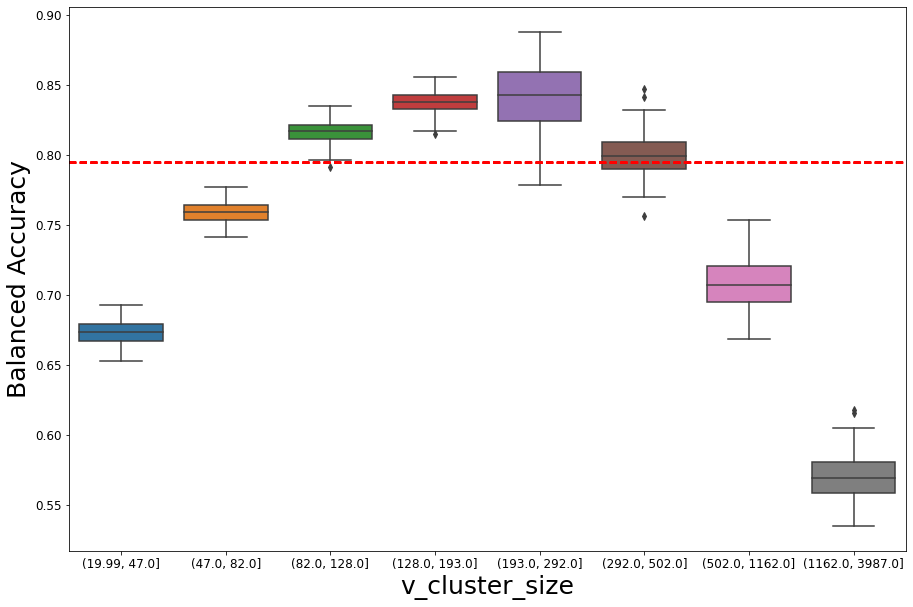

In [108]:
import scipy.stats
feat_list = ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries']
feat = feat_list[1]
#y_mean = np.mean(result_df[feat+'_balanced_acc'])
#low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,len(result_df)-1,loc=y_mean,
#                                                   scale=scipy.stats.sem(result_df[feat+'_balanced_acc']))
y_mean = np.mean(ave_acc)
low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,200-1,loc=y_mean,
                                                   scale=scipy.stats.sem(ave_acc))
fig2 = plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 12})
cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
a = list(cats.unique())
a.sort()
sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
plt.ylabel('Balanced Accuracy',fontsize=25)
plt.xlabel(feat,fontsize=25)

In [94]:
len(ave_acc)

200

In [95]:
low_CI_bound

0.4485206003089697

#### Interval correction for paper

In [99]:
ref = result_df['oster'].unique()[4]

In [100]:
ref

Interval(4.0600000000000005, 18.02, closed='right')

In [101]:
inv = pd.Interval(left=4.060, right=18.02)

In [102]:
result_df['oster'] = result_df['oster'].apply(lambda x: inv if x ==ref else x)


In [113]:
result_df

,v_sampling_fraction,v_sampling_fraction_balanced_acc,v_cluster_size,v_cluster_size_balanced_acc,v_timespan,v_timespan_balanced_acc,oster,oster_balanced_acc,PD,PD_balanced_acc,cherries,cherries_balanced_acc,BLD,BLD_balanced_acc,r_max,r_max_balanced_acc
0,"(0.52, 0.66]",0.842093,"(82.0, 128.0]",0.807408,"(34.0, 39.0]",0.811957,"(39.01, 52.01]",0.820604,"(515.0, 710.0]",0.776302,"(0.32, 0.34]",0.793764,NaN,NaN,"(113.73, 186.47]",0.817348
1,"(0.11, 0.22]",0.669274,"(502.0, 1162.0]",0.690519,"(18.0, 22.0]",0.759880,"(18.02, 22.01]",0.777865,"(376.0, 515.0]",0.775742,"(0.26, 0.28]",0.784294,NaN,NaN,"(43.24, 70.54]",0.757669
2,"(0.37, 0.52]",0.851105,"(193.0, 292.0]",0.855373,"(29.0, 34.0]",0.753611,"(29.01, 34.01]",0.757447,"(1520.0, 5334.0]",0.839637,"(0.11, 0.26]",0.755086,NaN,NaN,"(356.21, 3132914.0]",0.839781
3,"(0.91, 1.0]",0.734072,"(47.0, 82.0]",0.749008,"(22.0, 26.0]",0.737209,"(22.01, 26.01]",0.757806,"(23.99, 181.0]",0.715643,"(0.35, 0.46]",0.774584,NaN,NaN,"(186.47, 356.21]",0.790348
4,"(0.04, 0.11]",0.559676,"(292.0, 502.0]",0.807812,"(3.99, 18.0]",0.715098,"(4.06, 18.02]",0.749792,"(277.0, 376.0]",0.780306,"(0.31, 0.32]",0.797291,NaN,NaN,"(-3.36, 13.31]",0.732986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,"(0.91, 1.0]",0.724386,"(47.0, 82.0]",0.749246,"(22.0, 26.0]",0.739005,"(22.01, 26.01]",0.759766,"(23.99, 181.0]",0.721272,"(0.35, 0.46]",0.795073,NaN,NaN,"(186.47, 356.21]",0.838408
1596,"(0.04, 0.11]",0.541213,"(292.0, 502.0]",0.797581,"(3.99, 18.0]",0.732846,"(4.06, 18.02]",0.713356,"(277.0, 376.0]",0.758614,"(0.31, 0.32]",0.782729,NaN,NaN,"(-3.36, 13.31]",0.708650
1597,"(0.8, 0.91]",0.776828,"(19.99, 47.0]",0.682973,"(52.0, 224.0]",0.720745,"(52.01, 224.0]",0.724498,"(1008.0, 1520.0]",0.818292,"(0.28, 0.3]",0.776395,NaN,NaN,"(13.31, 25.31]",0.755197
1598,"(0.66, 0.8]",0.799936,"(128.0, 193.0]",0.834759,"(26.0, 29.0]",0.766664,"(26.01, 29.01]",0.764822,"(181.0, 277.0]",0.757311,"(0.34, 0.35]",0.782901,NaN,NaN,"(25.31, 43.24]",0.746078


In [118]:
import scipy.stats
def plot_mis_aly(result_df,  df, PT_df, R0_df, contact_df,  y_mean,low_CI_bound,high_CI_bound,metrics):
    fig = plt.figure(figsize=(30,30))
    grid = plt.GridSpec(60,80,wspace=10,hspace=10)
    font_size=15
    degree = 60
    plt.rcParams.update({'font.size': 15})
    feat_list = ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','state','PT','R0']
    feat = feat_list[0]
    plt.subplot(grid[4:18,0:24])
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Sampling Fraction',fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    plt.title('a.',loc='left',fontsize=30)
    
    plt.subplot(grid[4:18,28:52])
    feat = feat_list[1]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Cluster Size',fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    

    plt.subplot(grid[4:18,56:80])
    feat = feat_list[2]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy Loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Time Span',fontsize=25)
    #ax.set(ylim=(0.26, 0.68))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)

    plt.subplot(grid[24:38,12:36])
    #plt.subplot(grid[12:19,0:12])
    feat = feat_list[3]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    a[0] = inv
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Oster',fontsize=25)
    #ax.set(ylim=(0.26, 0.66))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    plt.title('b.',loc='left',fontsize=30)
    
    plt.subplot(grid[24:38,44:68])
    #plt.subplot(grid[12:19,14:26])
    feat = feat_list[4]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('PD',fontsize=25)
    #ax.set(ylim=(0.26, 0.65))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    
    #plt.subplot(grid[21:28,28:40])
    plt.subplot(grid[44:58,0:24])
    feat = 'Contact'
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    a = [4,6,15,20]
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=contact_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Initial contact number',fontsize=25)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    #ax.set(ylim=(0, 1.3))
    plt.title('c.',loc='left',fontsize=30)
    
    #plt.subplot(grid[30:37,6:18])
    plt.subplot(grid[44:58,28:52])
    feat = feat_list[6]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    a = [0.015, 0.025, 0.09, 0.11 , 0.12]
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=PT_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Mean P(T)',fontsize=25)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    #ax.set(ylim=(0, 1.15))

    #plt.subplot(grid[30:37,22:34])
    plt.subplot(grid[44:58,56:80])
    feat = feat_list[7]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    a = [0.7, 0.8, 0.9, 1.5, 3.2, 3.9, 4.3, 4.9, 9.8]
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=R0_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel(r'Initial $R_0$',fontsize=25)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    #ax.set(ylim=(0, 1.4))
    plt.show()
    #fig.savefig('../paper/mis_aly.eps',dpi=1200,format='eps',bbox_inches='tight',pad_inches=0.0)

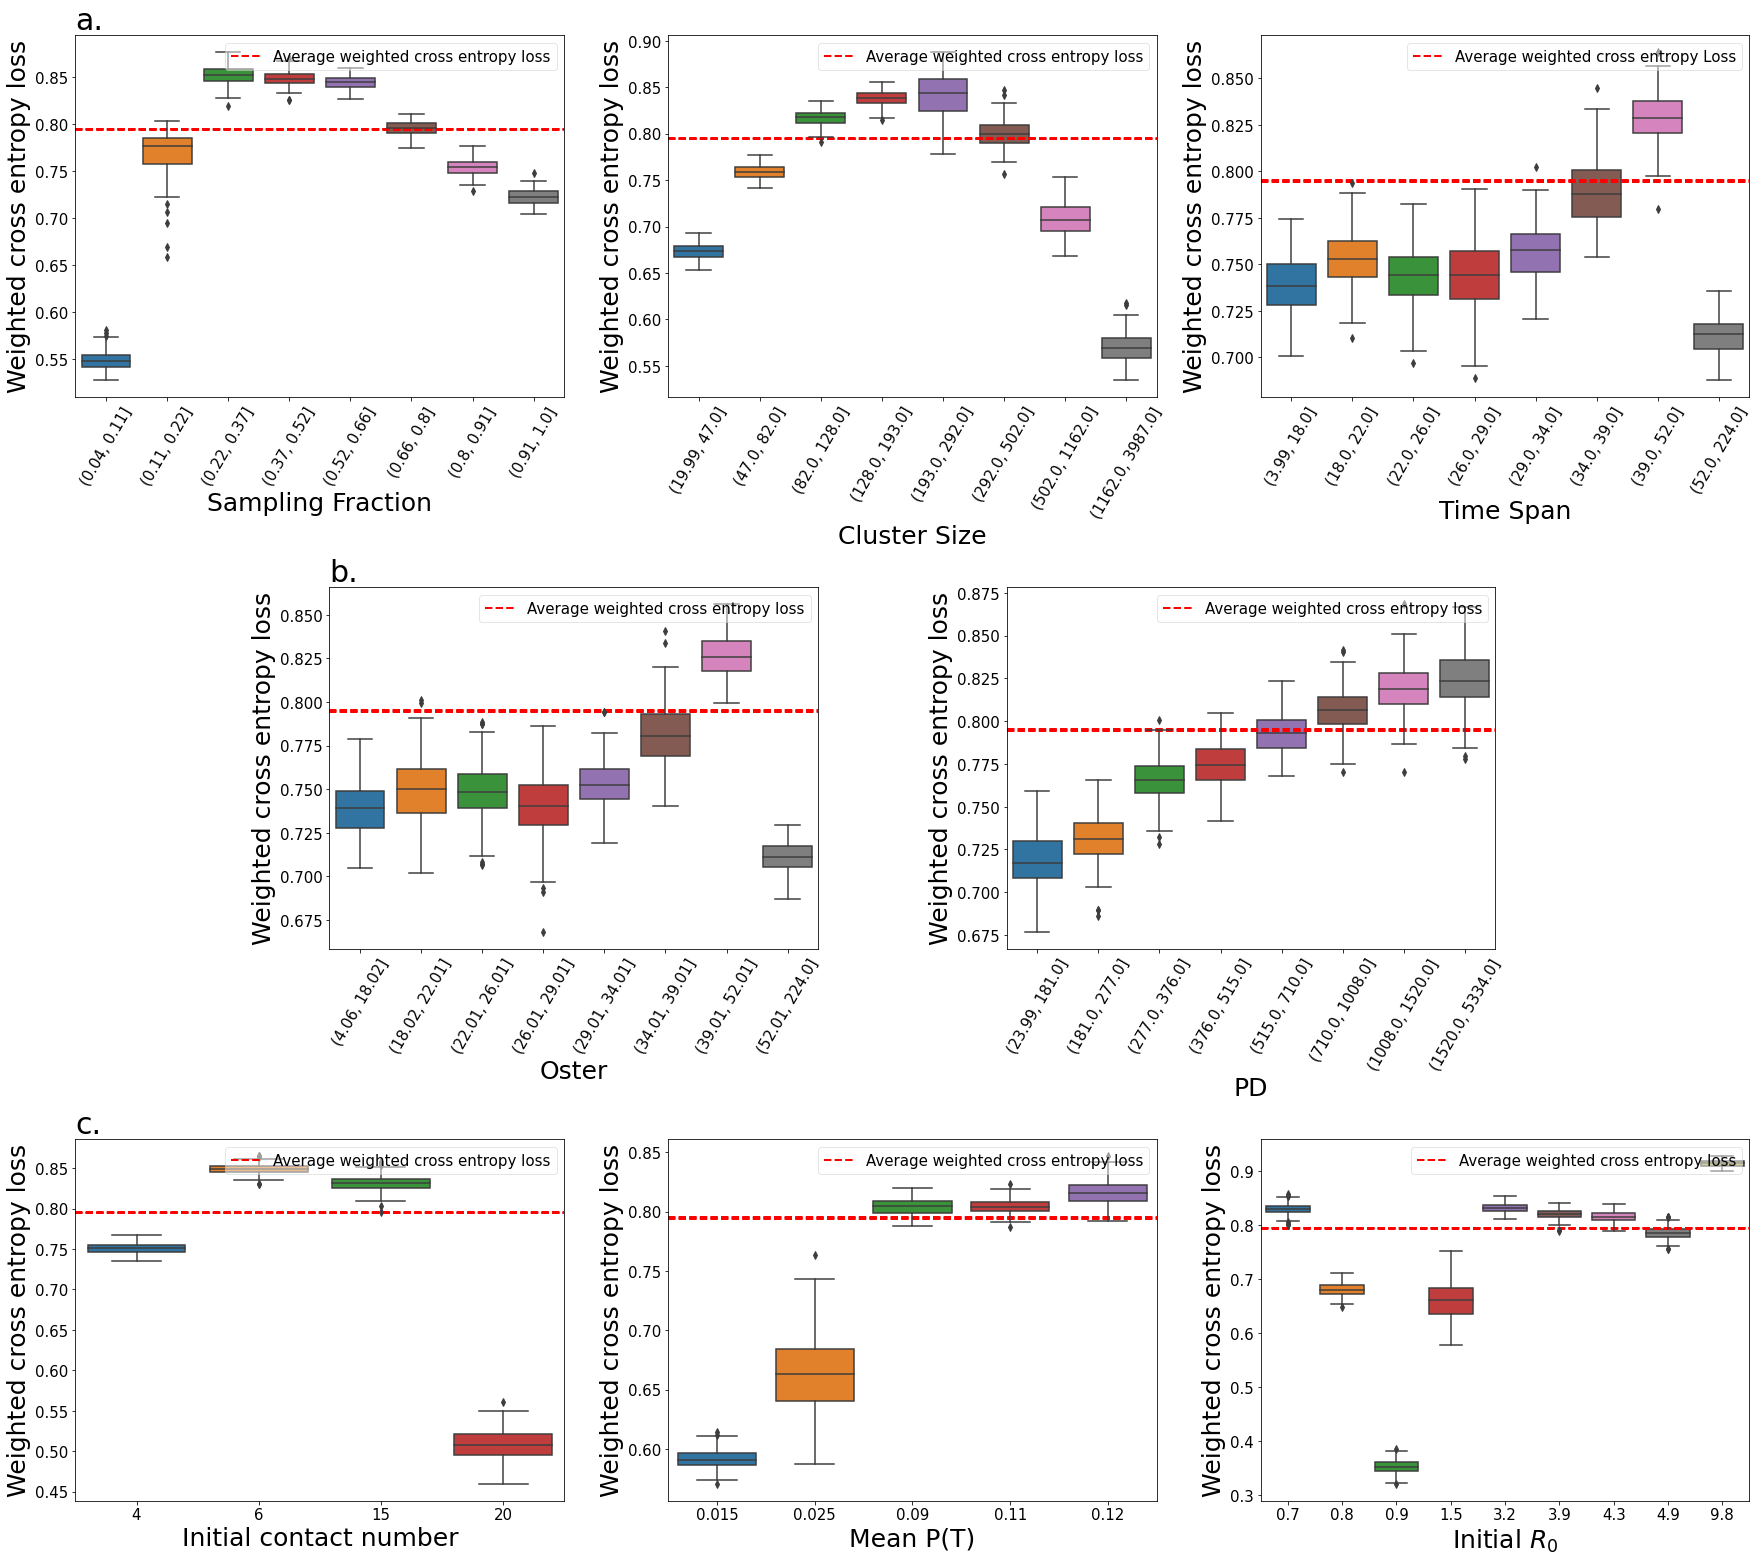

In [119]:
y_mean = np.mean(ave_acc)
low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,200-1,loc=y_mean,
                                                   scale=scipy.stats.sem(ave_acc))
plot_mis_aly(result_df,  df, PT_df, R0_df, contact_df, y_mean,low_CI_bound,high_CI_bound,'Balanced Acc')

In [23]:
#pdglstm only
Models = ['DeepDynaTree-PDGLSTM']
model_file = ['pdglstm']
feat_col = ['oster-norm','PD-norm','BLD-norm','gamma_cat','cherries-norm','ltt_shape_cat']
feat_name = ['Oster','PD','BLD',r'$\gamma$','Cherries','LTT Shape']

In [28]:
import csv

pmt_df = pd.DataFrame(columns=['Node Features','Models','reduced_acc','reduced_balance_acc','reduced_f1_weighted','reduced_f1_macro','reduced_brier_score','reduced_cross_entropy','reduced_macro_auc','reduced_weighted_auc'])
i = -1
j = 0
for model in model_file:
    print(model)
    i += 1
    with open(f"/mnt/data2/chaoyue/result/ddt/test/{model}50double/None-test.csv") as f:
        r = csv.reader(f)
        for row in r:
            if model in ['lr','rf','xgb']:
                ref = np.array(row[0:-2])
            else:
                if model in ['transet','deepset','tabnet']:
                    ref = np.array(row[1:7]+row[9:-2])
                else:
                    ref = np.array(row[1:7]+row[9:-2])
            ref = ref.astype(float)
            break
    k = 0
    for feat1 in range(6):
        for feat2 in range(feat1+1,6):
            title = [f'{feat_name[feat1]} - {feat_name[feat2]}',model]
            with open(f"/mnt/data2/chaoyue/result/ddt/test/{model}50double/{feat1}-{feat2}-test.csv") as f:
                r = csv.reader(f)
                for row in r:
                    if model in ['lr','rf','xgb']:
                        record = np.array(row[0:-2])
                    else:
                        if model in ['transet','deepset','tabnet']:
                            record = np.array(row[1:7]+row[9:-2])
                        else:
                            record = np.array(row[1:7]+row[9:-2])
                    record = record.astype(float)
                    record = title+list(abs(record-ref)/ref[1])
                    pmt_df.loc[j] = record
                    j += 1

pdglstm


In [29]:
pmt_df

,Node Features,Models,reduced_acc,reduced_balance_acc,reduced_f1_weighted,reduced_f1_macro,reduced_brier_score,reduced_cross_entropy,reduced_macro_auc,reduced_weighted_auc
0,Oster - PD,pdglstm,0.119260,0.084287,0.112719,0.122028,0.154107,0.236759,0.061140,0.080765
1,Oster - PD,pdglstm,0.118883,0.084539,0.112467,0.121525,0.153478,0.236130,0.061266,0.080891
2,Oster - PD,pdglstm,0.119763,0.084916,0.113222,0.122280,0.154359,0.237137,0.061140,0.080513
3,Oster - PD,pdglstm,0.119134,0.084413,0.112593,0.121651,0.153353,0.235250,0.060637,0.080010
4,Oster - PD,pdglstm,0.118757,0.084791,0.112341,0.121776,0.153101,0.235376,0.061014,0.080639
...,...,...,...,...,...,...,...,...,...,...
745,Cherries - LTT Shape,pdglstm,0.014216,0.011825,0.013587,0.018744,0.016857,0.026041,0.009687,0.013209
746,Cherries - LTT Shape,pdglstm,0.014593,0.012329,0.013964,0.019248,0.017361,0.026796,0.009687,0.013083
747,Cherries - LTT Shape,pdglstm,0.013964,0.011071,0.013335,0.018367,0.016857,0.026293,0.009435,0.012832
748,Cherries - LTT Shape,pdglstm,0.014970,0.012329,0.014341,0.019877,0.017361,0.026544,0.009687,0.013209


In [30]:
order_df = pd.DataFrame(columns=['feat','value'])
i = 0
for feat in set(pmt_df['Node Features'].values):
    a = sum(pmt_df[pmt_df['Node Features']==feat]['reduced_balance_acc'].values)
    order_df.loc[i] = [feat,a]
    i += 1
order_df

,feat,value
0,Oster - Cherries,4.171846
1,BLD - Cherries,1.178890
2,BLD - $\gamma$,1.252988
3,Cherries - LTT Shape,0.592527
4,PD - LTT Shape,3.021386
5,PD - Cherries,3.077368
6,PD - $\gamma$,2.812303
7,PD - BLD,3.986288
8,BLD - LTT Shape,1.152220
9,Oster - LTT Shape,4.222418


In [31]:
order_df.sort_values("value",ascending=False)

,feat,value
14,Oster - $\gamma$,4.393257
9,Oster - LTT Shape,4.222418
12,Oster - PD,4.210341
0,Oster - Cherries,4.171846
10,Oster - BLD,4.062775
7,PD - BLD,3.986288
5,PD - Cherries,3.077368
4,PD - LTT Shape,3.021386
6,PD - $\gamma$,2.812303
2,BLD - $\gamma$,1.252988


In [32]:
4.393257/50

0.08786514000000001

In [104]:
order = list(order_df.sort_values("value",ascending=False)['feat'].values)

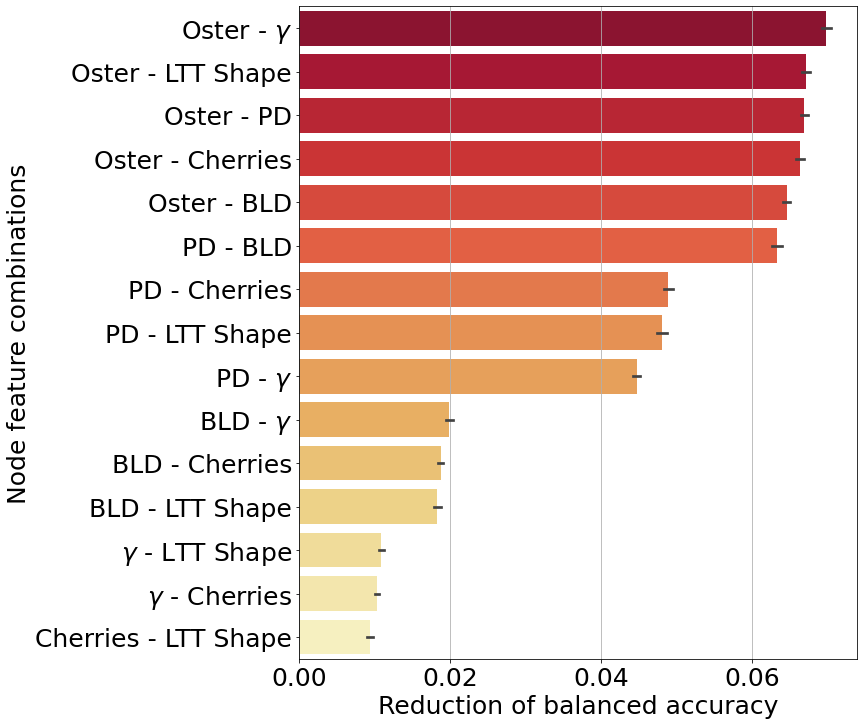

In [106]:
fig1 = plt.figure(figsize=(10,12))
plt.rcParams.update({'font.size': 25})
ax = sns.barplot(y="Node Features",x="reduced_balance_acc",  data=pmt_df, order=order, hue_order=order, ci='sd',palette=sns.color_palette('YlOrRd_r',len(order)))
#ax.set_xlim(-.005,.07)
plt.grid(axis="x")
#plt.xticks(rotation=70)
plt.ylabel('Node feature combinations',fontsize=25)
plt.xlabel('Reduction of balanced accuracy',fontsize=25)
plt.show()
fig1.savefig('../paper/pdglstm_feat_double.eps',dpi=1200,format='eps',bbox_inches='tight',pad_inches=0.0)